# 1. Data Import and Pre-Processing

## Import and NA - Values

In [54]:
import pandas as pd
import csv
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

Please select file which was attached to the Email!

In [55]:
uploaded = files.upload()

Saving Data.csv to Data (2).csv


In [56]:
start_data = pd.read_csv("Data.csv")
start_data = start_data.dropna()
start_data = start_data.set_index('symbol')
start_data_enterprise_value = start_data.drop(['Unnamed: 0', 'industry', 'sector', 'price', 'beta', 'logMktCap', 'peRatioTTM', 'debtRatioTTM', 'priceToBookRatioTTM'], axis=1)
start_data = start_data.drop(['Unnamed: 0', 'industry', 'sector', 'enterpriseValue', 'price'], axis=1)
df = start_data
start_data

,beta,logMktCap,peRatioTTM,debtRatioTTM,priceToBookRatioTTM
symbol,,,,,
MAT,1.147192,22.692615,12.177711,0.695824,3.642363
LE,2.760027,19.489673,40.818180,0.682128,0.770071
WERN,0.862922,21.816030,11.826972,0.501515,2.124816
RDNT,1.566096,20.863101,184.909090,0.796014,3.687410
IGT,1.870596,22.381640,15.074286,0.792880,3.361582
...,...,...,...,...,...
TECTP,0.000000,17.560282,4.849047,0.840916,0.815490
ARCE,0.526708,20.621233,385.746487,0.672868,2.282053
J,0.885943,23.465411,24.522089,0.540469,2.574552


In [57]:
nan_count = start_data.isna().sum()
nan_count

beta                   0
logMktCap              0
peRatioTTM             0
debtRatioTTM           0
priceToBookRatioTTM    0
dtype: int64

## Handeling Outliers


The objective is to remove outliers that could skew the results of distance-based clustering, aiming to achieve a more accurate representation of the data distribution, which can be visualized through histograms.

Especially peRatioTTM, debtRatioTTM and priceToBookRatioTTM have great outliers. In the following I use Tukey’s rule to detect outliers. The following source provides further explanation about the topic:

source: https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

In [58]:
Q1 = start_data['priceToBookRatioTTM'].quantile(0.05)
Q3 = start_data['priceToBookRatioTTM'].quantile(0.90)
IQR_Q = Q3 - Q1

D1 = start_data['debtRatioTTM'].quantile(0.05)
D3 = start_data['debtRatioTTM'].quantile(0.80)
IQR_D = D3 - D1

P1 = start_data['peRatioTTM'].quantile(0.05)
P3 = start_data['peRatioTTM'].quantile(0.80)
IQR_P = P3 - P1

In [59]:
lower_lim_q = Q1 - 1.5 * IQR_Q
upper_lim_q = Q3 + 1.5 * IQR_Q

lower_lim_d = D1 - 1.5 * IQR_D
upper_lim_d = D3 + 1.5 * IQR_D

lower_lim_p = P1 - 1.5 * IQR_P
upper_lim_p = P3 + 1.5 * IQR_P

In [60]:
outliers_15_low_q = (start_data['priceToBookRatioTTM'] < lower_lim_q)
outliers_15_up_q = (start_data['priceToBookRatioTTM'] > upper_lim_q)

outliers_15_low_d = (start_data['debtRatioTTM'] < lower_lim_d)
outliers_15_up_d = (start_data['debtRatioTTM'] > upper_lim_d)

outliers_15_low_p = (start_data['peRatioTTM'] < lower_lim_p)
outliers_15_up_p = (start_data['peRatioTTM'] > upper_lim_p)

In [61]:
df_outliers_without = start_data[~(outliers_15_low_d | outliers_15_up_d | outliers_15_low_q | outliers_15_up_q | outliers_15_low_p | outliers_15_up_p)]

In [62]:
df_outliers_without

,beta,logMktCap,peRatioTTM,debtRatioTTM,priceToBookRatioTTM
symbol,,,,,
MAT,1.147192,22.692615,12.177711,0.695824,3.642363
LE,2.760027,19.489673,40.818180,0.682128,0.770071
WERN,0.862922,21.816030,11.826972,0.501515,2.124816
IGT,1.870596,22.381640,15.074286,0.792880,3.361582
FDUS,1.599581,20.026179,6.120482,0.478551,1.046757
...,...,...,...,...,...
CASS,0.633065,20.303575,19.094862,0.926561,3.412074
TECTP,0.000000,17.560282,4.849047,0.840916,0.815490
J,0.885943,23.465411,24.522089,0.540469,2.574552


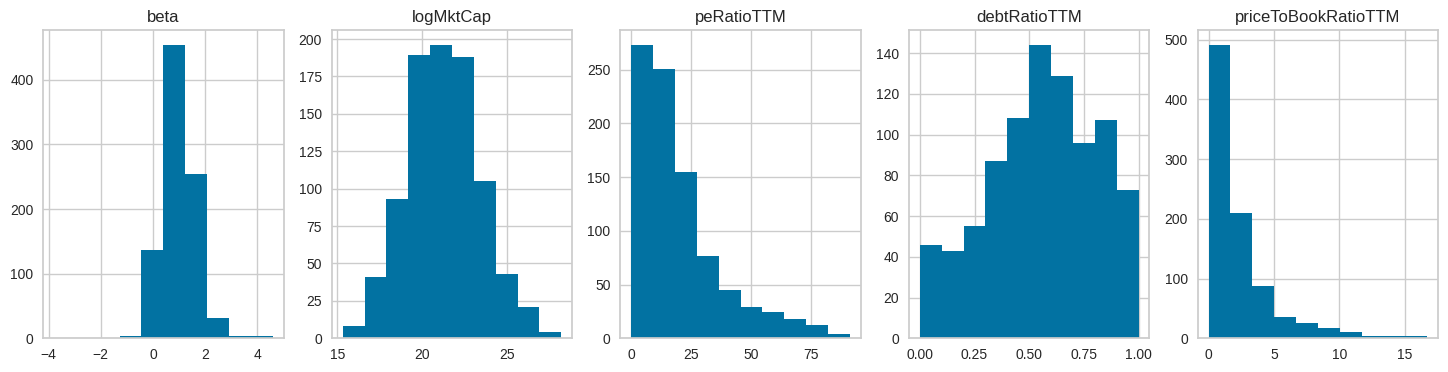

In [63]:
fig, axs = plt.subplots(1, 5, figsize = (18, 4))

df_outliers_without['beta'].hist(ax = axs[0], legend = False)
df_outliers_without['logMktCap'].hist(ax = axs[1], legend = False)
df_outliers_without['peRatioTTM'].hist(ax = axs[2], legend = False)
df_outliers_without['debtRatioTTM'].hist(ax = axs[3], legend = False)
df_outliers_without['priceToBookRatioTTM'].hist(ax = axs[4], legend = False)

axs[0].set_title('beta')
axs[1].set_title('logMktCap')
axs[2].set_title('peRatioTTM')
axs[3].set_title('debtRatioTTM')
axs[4].set_title('priceToBookRatioTTM')

plt.show()

## Normalizing Data

In the subsequent step, I normalize the features because K-means clustering relies on distance-based metrics, and this normalization is crucial to prevent features with higher values from disproportionately influencing the cluster formation.

In [64]:
Normalized_mean = df_outliers_without.mean()
Normalized_std = df_outliers_without.std(ddof = 1)
start_data_scaled = (df_outliers_without - Normalized_mean) / Normalized_std
start_data_scaled

,beta,logMktCap,peRatioTTM,debtRatioTTM,priceToBookRatioTTM
symbol,,,,,
MAT,0.241479,0.671649,-0.453323,0.557672,0.495728
LE,2.673141,-0.833683,1.202453,0.501955,-0.649918
WERN,-0.187113,0.259668,-0.473600,-0.232810,-0.109563
IGT,1.332151,0.525496,-0.285865,0.952512,0.383735
FDUS,0.923543,-0.581534,-0.803507,-0.326229,-0.539559
...,...,...,...,...,...
CASS,-0.533667,-0.451162,-0.053426,1.496349,0.403874
TECTP,-1.488135,-1.740467,-0.877011,1.147931,-0.631802
J,-0.152404,1.034851,0.260336,-0.074336,0.069819


# 2. Elbow Method

The elbow method is a technique used in clustering analysis to determine the optimal number of clusters by identifying the point on a graph where the within-cluster sum of squares starts to level off, resembling an "elbow." In my case the optimal number of clusters accoring to the Elbow Method is 6.

In [65]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(start_data_scaled)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

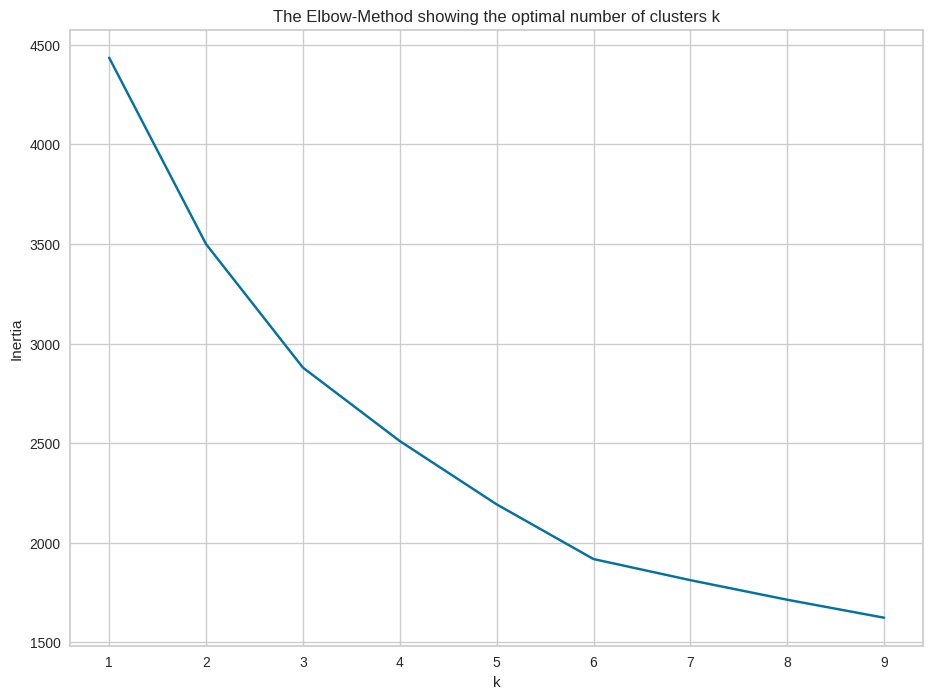

In [66]:
plt.figure(figsize=(11,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow-Method showing the optimal number of clusters k')
plt.show()

# 3. Silhoette Score

The analysis of silhouette scores indicates that the optimal number of clusters appears to be 2, as it exhibits the highest silhouette score. To visually confirm this, a plot of the various silhouette scores is provided for further examination.

In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score
#define a function which plots silhouette scores for a given k-means clustering model
def plot_silhouettes(data, k_means):
    X = data
    labels = k_means.labels_

    n_clusters = len(np.unique(labels))

    fig, ax = plt.subplots(1, 1, figsize = (8, 6))

    x_split = 10

    ax.set_xlim([0, len(X) + (n_clusters + 1) * x_split])
    ax.set_ylim([np.min(silhouette_samples(X, labels)) - 0.1, 1])

    x_lower = x_split

    sample_silhouette_scores = silhouette_samples(X, labels)

    for i in range(n_clusters):

        ith_cluster_silhouette_scores = sample_silhouette_scores[labels == i]
        ith_cluster_silhouette_scores.sort()

        ith_size = ith_cluster_silhouette_scores.shape[0]

        x_upper = x_lower + ith_size

        ax.fill_between(np.arange(x_lower, x_upper), 0,
                        ith_cluster_silhouette_scores)

        x_lower = x_upper + x_split

    ax.set_xlabel('Observations')
    ax.set_ylabel('Silhouette score')
    ax.set_title(f'Avg. Silhouette score: {silhouette_score(X, labels):.2f}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


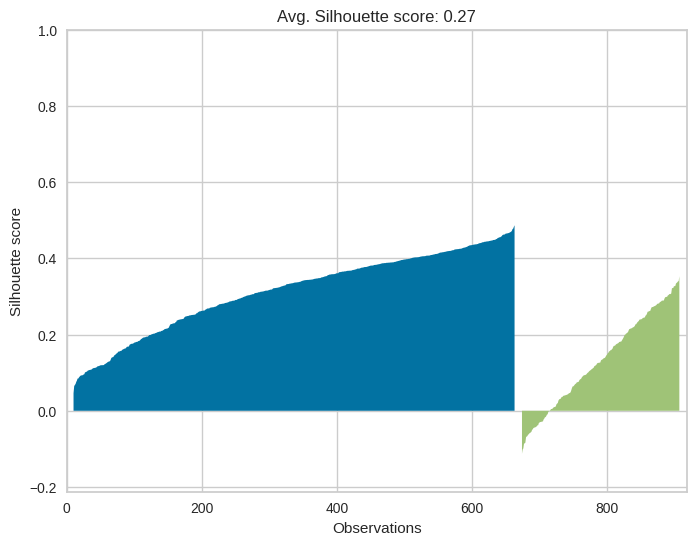

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


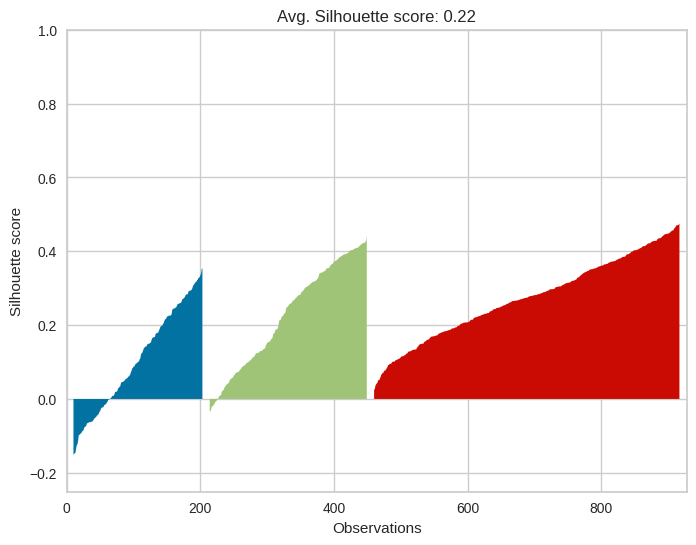

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


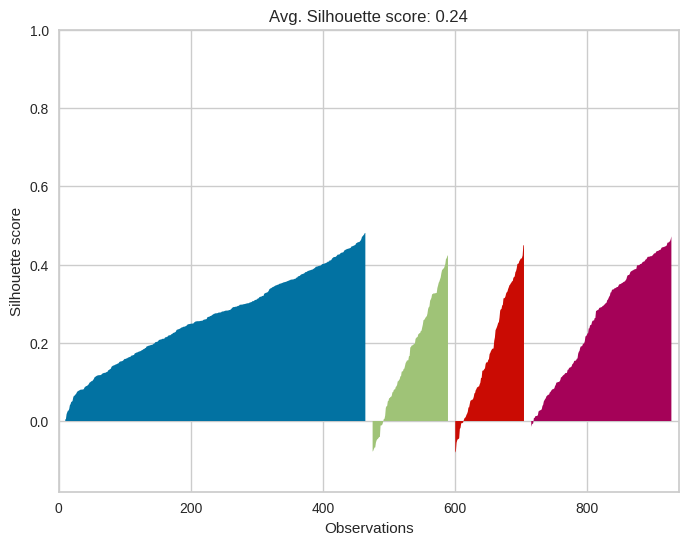

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


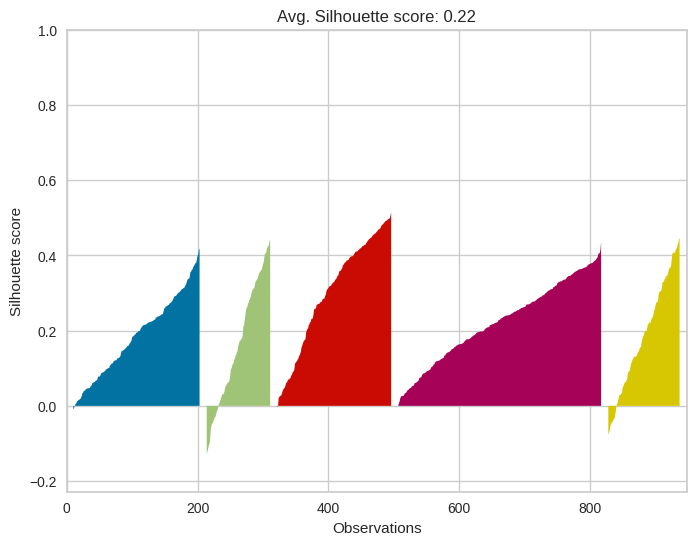

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


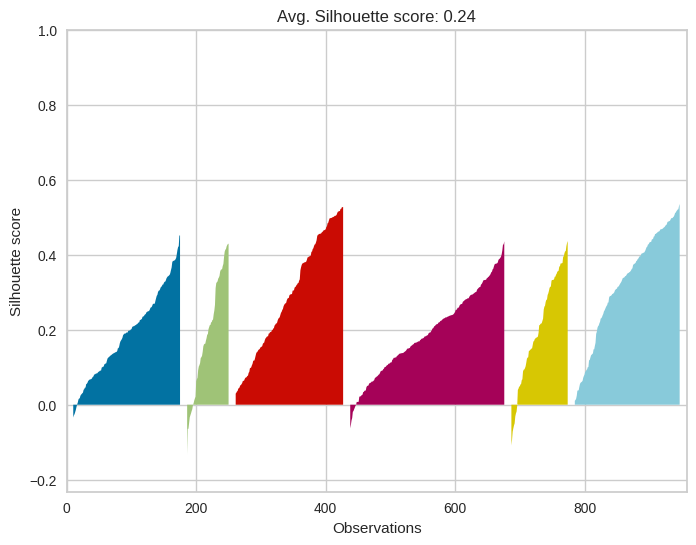

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


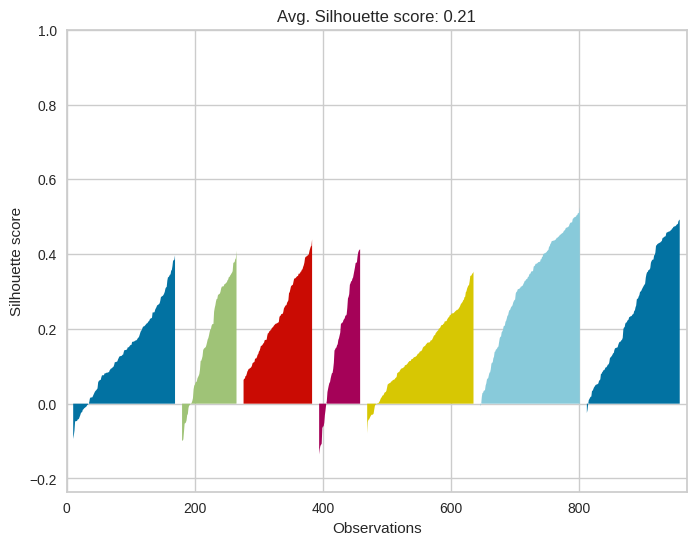

In [68]:
kmeans = KMeans(n_clusters = 2, random_state = 42).fit(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values)
plot_silhouettes(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values, kmeans)

kmeans = KMeans(n_clusters = 3, random_state = 42).fit(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values)
plot_silhouettes(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values, kmeans)

kmeans = KMeans(n_clusters = 4, random_state = 42).fit(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values)
plot_silhouettes(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values, kmeans)

kmeans = KMeans(n_clusters = 5, random_state = 42).fit(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values)
plot_silhouettes(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values, kmeans)

kmeans = KMeans(n_clusters = 6, random_state = 42).fit(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values)
plot_silhouettes(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values, kmeans)

kmeans = KMeans(n_clusters = 7, random_state = 42).fit(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values)
plot_silhouettes(start_data_scaled[['beta',	'logMktCap',	'peRatioTTM',	'debtRatioTTM',	'priceToBookRatioTTM']].values, kmeans)

# 4. Number of Companies in Clusters


Excluding outliers when each cluster contains roughly the same amount of data is crucial, as it not only ensures a balanced representation of each cluster but also prevents extreme data points from disproportionately influencing the clustering results, thereby enhancing the accuracy and reliability of the analysis.


While the number of data points in clusters 4 and 0 is still substantial, it is significantly improved compared to not using preprocessing.

In [69]:
kmeans = KMeans(n_clusters=6, random_state = 30).fit(start_data_scaled)
kmeans.fit(start_data_scaled)

final_data = pd.DataFrame()

final_data = pd.merge(start_data, start_data_scaled, left_index=True, right_index=True)

final_data['cluster'] = kmeans.labels_

final_data = final_data.rename(columns={"beta_x": "beta", "logMktCap_x": "logMktCap", "peRatioTTM_x": "peRatioTTM", "debtRatioTTM_x" : "debtRatioTTM", "priceToBookRatioTTM_x" : "priceToBookRatioTTM"})
final_data = final_data.drop(['beta_y', 'logMktCap_y', 'peRatioTTM_y', 'debtRatioTTM_y', 'priceToBookRatioTTM_y'], axis=1)

final_data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,beta,logMktCap,peRatioTTM,debtRatioTTM,priceToBookRatioTTM,cluster
symbol,,,,,,
MAT,1.147192,22.692615,12.177711,0.695824,3.642363,4
LE,2.760027,19.489673,40.818180,0.682128,0.770071,1
WERN,0.862922,21.816030,11.826972,0.501515,2.124816,4
IGT,1.870596,22.381640,15.074286,0.792880,3.361582,1
FDUS,1.599581,20.026179,6.120482,0.478551,1.046757,1
...,...,...,...,...,...,...
CASS,0.633065,20.303575,19.094862,0.926561,3.412074,5
TECTP,0.000000,17.560282,4.849047,0.840916,0.815490,5
J,0.885943,23.465411,24.522089,0.540469,2.574552,4


<BarContainer object of 6 artists>

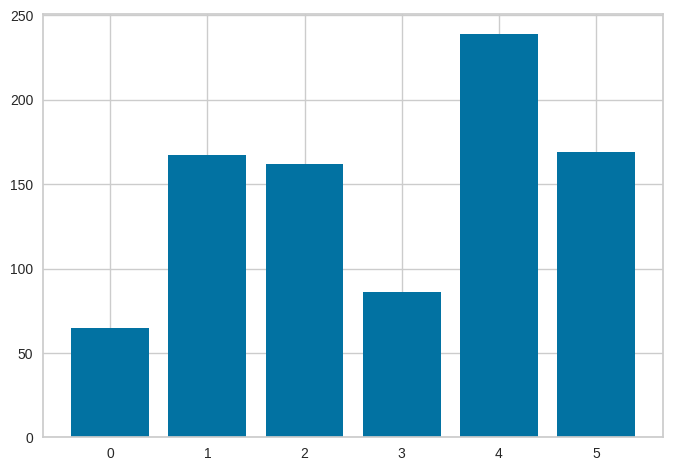

In [70]:
number = final_data['cluster'].value_counts()
plt.bar(number.index, number.values)

# 5. Average Cluster Values

In [71]:
start_data_enterprise = pd.merge(final_data, start_data_enterprise_value, left_index=True, right_index=True)
start_data_enterprise

,beta,logMktCap,peRatioTTM,debtRatioTTM,priceToBookRatioTTM,cluster,enterpriseValue
symbol,,,,,,,
MAT,1.147192,22.692615,12.177711,0.695824,3.642363,4,9.385950e+09
LE,2.760027,19.489673,40.818180,0.682128,0.770071,1,8.186498e+08
WERN,0.862922,21.816030,11.826972,0.501515,2.124816,4,3.251621e+09
IGT,1.870596,22.381640,15.074286,0.792880,3.361582,1,1.164789e+10
FDUS,1.599581,20.026179,6.120482,0.478551,1.046757,1,6.237847e+08
...,...,...,...,...,...,...,...
CASS,0.633065,20.303575,19.094862,0.926561,3.412074,5,5.534382e+08
TECTP,0.000000,17.560282,4.849047,0.840916,0.815490,5,3.331183e+07
J,0.885943,23.465411,24.522089,0.540469,2.574552,4,1.826141e+10


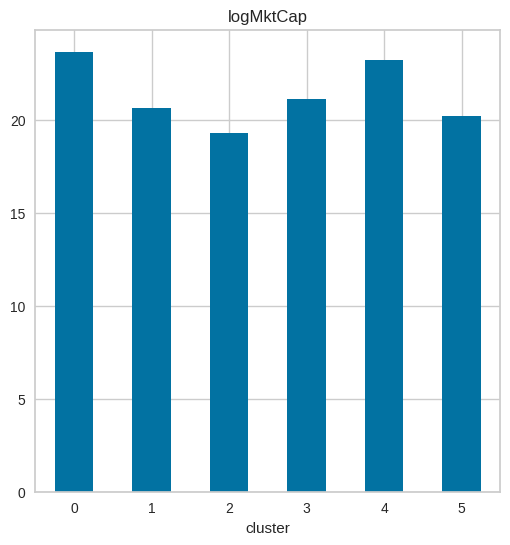

In [72]:
data_mk = start_data_enterprise.groupby('cluster')['logMktCap'].mean()

axes = data_mk.plot(kind='bar', rot=0, subplots=True, figsize=(6, 6))

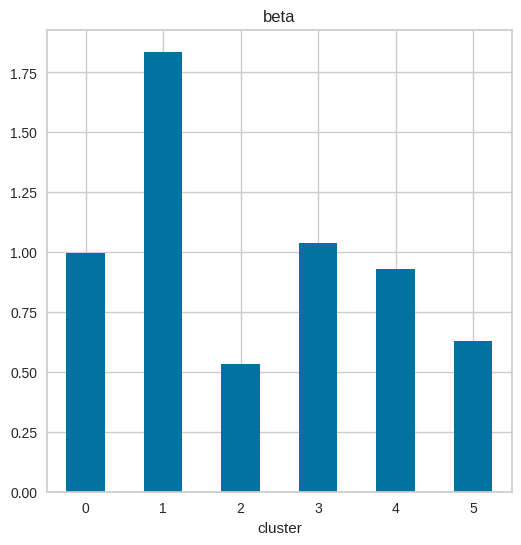

In [73]:
data_beta = start_data_enterprise.groupby('cluster')['beta']
data_beta = data_beta.mean()
axes = data_beta.plot(kind='bar', rot=0, subplots=True, figsize=(6, 6))

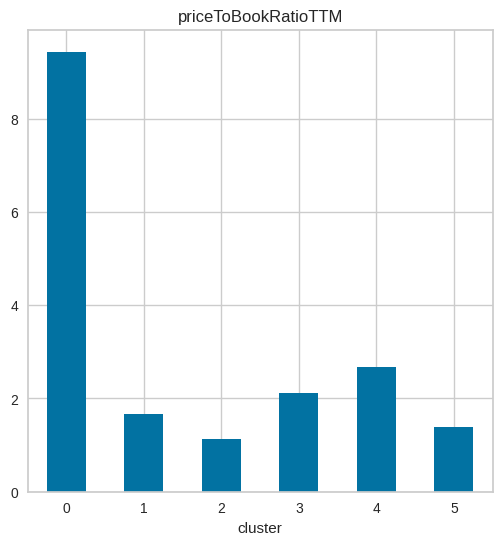

In [74]:
data_book = final_data.groupby('cluster')['priceToBookRatioTTM']
data_book = data_book.mean()
axes = data_book.plot(kind='bar', rot=0, subplots=True, figsize=(6, 6))

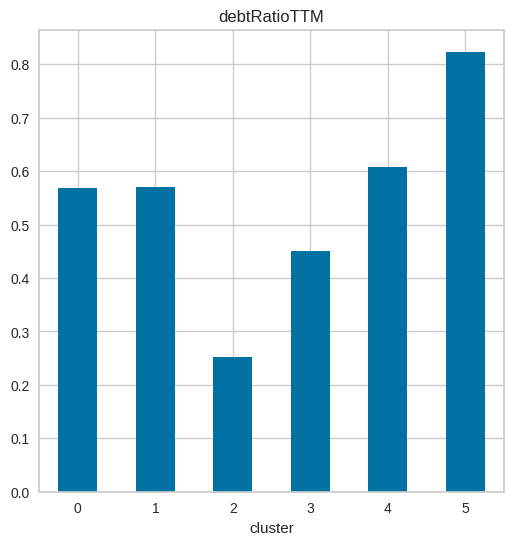

In [75]:
data_ratio = final_data.groupby('cluster')['debtRatioTTM']
data_ratio = data_ratio.mean()
axes = data_ratio.plot(kind='bar', rot=0, subplots=True, figsize=(6, 6))

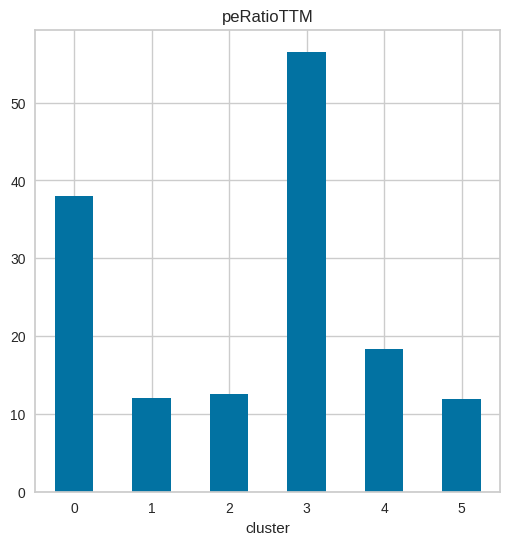

In [76]:
data_pe = final_data.groupby('cluster')['peRatioTTM']
data_pe = data_pe.mean()
axes = data_pe.plot(kind='bar', rot=0, subplots=True, figsize=(6, 6))

Cluster Interpretation:
---



**Cluster 0:** is characterized by its high priceToBookTTM values and the greatest logMktCap among the clusters. Stocks may be overvalued and stocks represent larger and established companies.

**Cluster 1:** characterized by high beta values and evenly spread across the other factors. This implies that the stocks are more sensitive to market flucuations.

**Cluster 2:** is averge in almost all categories and It does not stand out in any category

**Cluster 3:** High peRatioTTM values. This indicates positive expectations for the companies future performance.

**Cluster 4:** Has a high debtRatioTTM, beta and logMktCap: This suggests that the companies in this cluster may have higher financial leverage, be more market-sensitive, and potentially represent larger firms in terms of market capitalization.

**Cluster 5:** highest debtRatioTTM and seems undervalued when looking at the peRatioTTM

# 6. Average Enterprise Value

To better observe the average enterprise value of each cluster a regression analysis is invoked. The regression analysis highlights how the features affect the target variable, revealing that logMktCap is the only factor with a positive influence, suggesting that it is likely to have a significant impact on enterpriseValue.

In [79]:
X = start_data_enterprise.loc[:,['beta','logMktCap','priceToBookRatioTTM',	'peRatioTTM', 'debtRatioTTM']]
X = sm.add_constant(X)
y = start_data_enterprise['enterpriseValue']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        enterpriseValue   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.157
Date:                Wed, 13 Sep 2023   Prob (F-statistic):              0.329
Time:                        08:19:43   Log-Likelihood:                -28241.
No. Observations:                 888   AIC:                         5.649e+04
Df Residuals:                     882   BIC:                         5.652e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -8.373e+12   5.67e+12     -1.476      0.140   -1.95e+13    2.76e+12
beta                -1.255e+12   8.03e+11     -1.563      0.118   -2.83e+12    3.21e+11
logMktCap            5.393e+11   2.82e+11      1.913      0.056   -1.41e+10    1.09e+12
priceToBookRatioTTM   -1.3e+11   2.44e+11     -0.533      0.594   -6.09e+11    3.49e+11
peRatioTTM          -2.067e+10    3.3e+10     -0.626      0.531   -8.54e+10    4.41e+10
debtRatioTTM        -6.911e+11   2.23e+12     -0.310      0.757   -5.06e+12    3.68e+12
==============================================================================
Omnibus:                     2321.900   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23777674.711
Skew:                          27.772   Prob(JB):                         0.00
Kurtosis:                     802.722   Cond. No.                         346.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

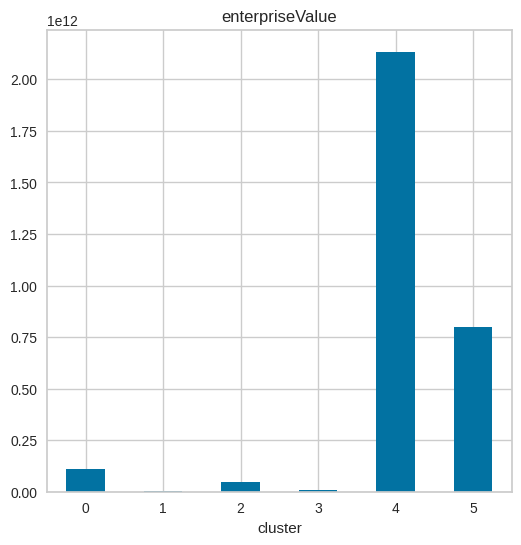

In [78]:
EV = start_data_enterprise.groupby('cluster')['enterpriseValue'].mean()

axes = EV.plot(kind='bar',rot = 0, subplots=True, figsize=(6, 6))

Within cluster 4, it becomes evident that LogMktCap plays a notable role in influencing enterpriseValue. In contrast, the elevated logMktCap within cluster 0 appears to have no discernible impact on enterpriseValue, possibly owing to the debtRatio and peRatio characteristics of clusters 0 and 5.